In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv('all_diabetes.csv')

In [28]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
df['blood_glucose_level'].describe().transpose()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [30]:
df.duplicated().sum()

3854

In [40]:
df.drop_duplicates(inplace=True)

In [36]:
len(df)

96146

In [ ]:
gen = df['gender'].value_counts()
gen

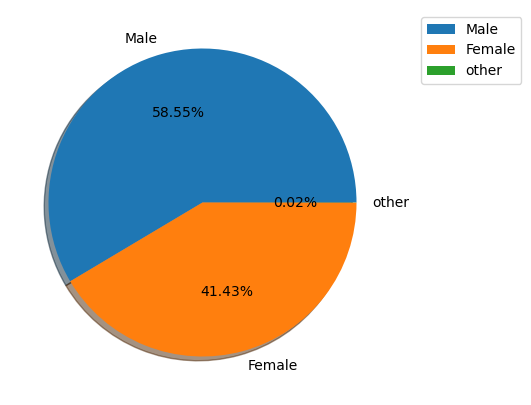

In [26]:
gen = df['gender'].value_counts()
labels = ["Male","Female","other"]
plt.figure(figsize=(9,5))
plt.pie(gen,labels=labels,autopct='%.2f%%',shadow=True)
plt.legend(title='gender')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

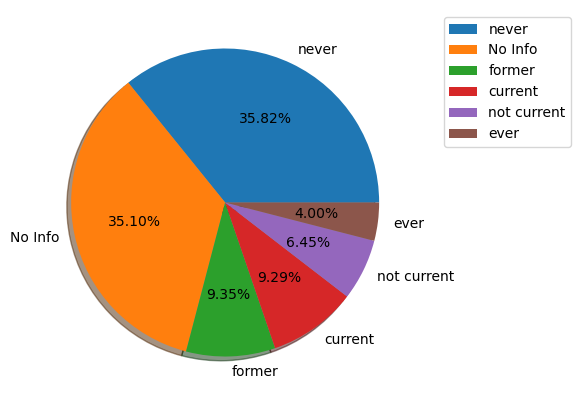

In [33]:
smoke = df['smoking_history'].value_counts()
labels = ["never","No Info","former","current","not current","ever"]
plt.figure(figsize=(9,5))
plt.pie(smoke,labels=labels,autopct='%.2f%%',shadow=True)
plt.legend(title='smoking statues')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

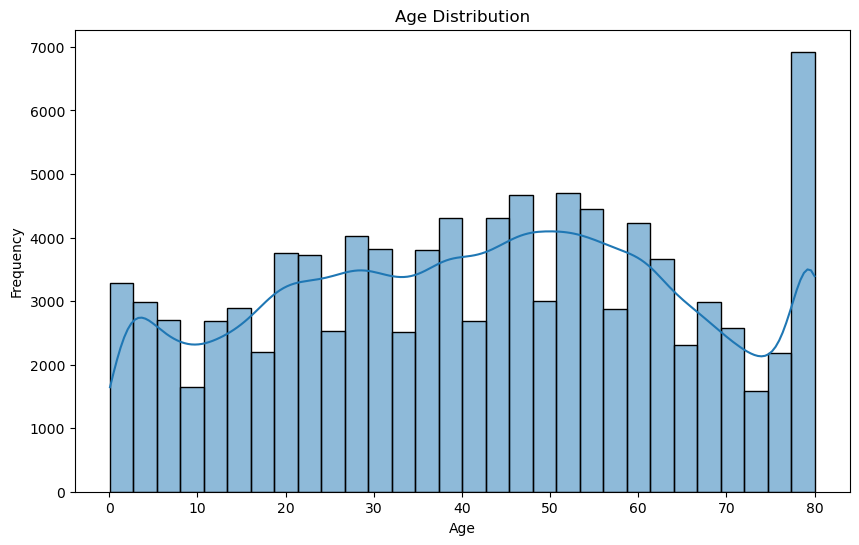

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

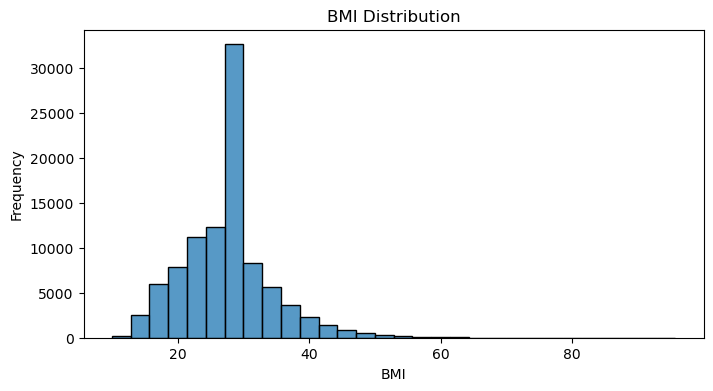

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df['bmi'],  bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [45]:
le=LabelEncoder()
list=['smoking_history','gender']
for i in list:
    df[i]=le.fit_transform(df[i])

In [47]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [49]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


In [51]:
X = df.drop(['diabetes','gender'],axis=1)
y = df['diabetes']

In [53]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [55]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
accuracy_score(y_test , y_pred)

0.9531

In [61]:
k_values = range(3,10,2)
test_accuracies = []

# Train the k-NN classifier with different values of k and evaluate on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(accuracy)

# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 9


# Prepare Data for DWH After Staging

In [38]:
df = pd.read_csv('all_diabetes.csv')

In [42]:
dff = df.copy()

In [44]:
dff = dff.drop(columns=['gender',],axis=1)

In [46]:
dff['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [48]:
(df['smoking_history'] == 'ever').sum()

3998

In [50]:
(df['smoking_history'] == 'not current').sum()

6367

In [52]:
dff = dff[(dff['smoking_history'] != 'not current') & (dff['smoking_history'] != 'ever')]

In [54]:
len(dff)

85781

In [56]:
dff['smoking_history'] = dff['smoking_history'].replace('No Info', 'Unknown')

In [58]:
dff['smoking_history'] = dff['smoking_history'].replace('former', 'formerly smoked')

In [60]:
dff['smoking_history'] = dff['smoking_history'].replace('current', 'smokes')

In [62]:
dff['smoking_history'] = dff['smoking_history'].replace('never', 'never smoked')

In [64]:
dff['smoking_history'].unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

In [195]:
dff.duplicated().sum()

6229

In [197]:
dff.drop_duplicates(inplace=True)

In [199]:
len(dff)

83320

In [66]:
le=LabelEncoder()
list=['smoking_history']
for i in list:
    dff[i]=le.fit_transform(dff[i])

In [74]:
#dff.to_csv(r'diabetesML1.csv',index=False)

In [213]:
X = dff.drop(['diabetes'],axis=1)
y = dff['diabetes']

In [215]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [217]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [219]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [221]:
accuracy_score(y_test , y_pred)

0.953132501200192

In [ ]:
dff.to_csv(dff.to_excel(r'D:\Final Project\diabetes_cleaned11.xlsx', index=False))